The purpose of this notebook is to compare top meme cryptos (DOGE-related) with market caps over 100m. To date, there are currently seven (7) Doge-meme cryptos (DMCs) with a market cap over 100m USD:

- Dogecoin - DOGE
- SHIBA INU - SHIB
- Dogelon Mars - ELON
- Samoyedcoin - SAMO
- Hoge Finance - HOGE
- Doge Dash - DOGEDASH

The initial analysis will focus on the two largest coins - DOGE and SHIB


In [12]:
import pandas as pd
import datetime as dt
from pandas_datareader import data
import yfinance as yf

### To scrape information on a single ticker

In [62]:
doge=yf.Ticker("DOGE-USD")

In [25]:
doge.info['volume']

1628770944

### Scrape Information on Multiple Tickers

In [17]:
df=yf.download(
tickers = ['DOGE-USD', 'SHIB-USD'],
period = '6mo')

[*********************100%***********************]  2 of 2 completed


In [18]:
df

Adj Close               Close                High            \
            DOGE-USD  SHIB-USD  DOGE-USD  SHIB-USD  DOGE-USD  SHIB-USD   
Date                                                                     
2021-05-17  0.487892       NaN  0.487892       NaN  0.515221       NaN   
2021-05-18  0.476115       NaN  0.476115       NaN  0.515599       NaN   
2021-05-19  0.333123  0.000009  0.333123  0.000009  0.684735  0.000016   
2021-05-20  0.400194  0.000010  0.400194  0.000010  0.433192  0.000012   
2021-05-21  0.359382  0.000008  0.359382  0.000008  0.411975  0.000010   
...              ...       ...       ...       ...       ...       ...   
2021-11-13  0.261706  0.000052  0.261706  0.000052  0.262251  0.000053   
2021-11-14  0.262912  0.000053  0.262912  0.000053  0.271257  0.000056   
2021-11-15  0.256529  0.000053  0.256529  0.000053  0.265170  0.000056   
2021-11-16  0.237249  0.000048  0.237249  0.000048  0.257094  0.000054   
2021-11-17  0.236553  0.000048  0.236553  0.000048  0.240472  0.000050   

                 Low                Open                 Volume                
            DOGE-USD  SHIB-USD  DOGE-USD  SHIB-USD     DOGE-USD      SHIB-USD  
Date                                                                           
2021-05-17  0.458551       NaN  0.513413       NaN   7330830504           NaN  
2021-05-18  0.470384       NaN  0.486954       NaN   4802902841           NaN  
2021-05-19  0.218267  0.000006  0.476435  0.000016  15072620946  3.271068e+09  
2021-05-20  0.296253  0.000008  0.330252  0.000009  12415484460  2.507946e+09  
2021-05-21  0.314766  0.000007  0.398124  0.000010   7452862203  1.547208e+09  
...              ...       ...       ...       ...          ...           ...  
2021-11-13  0.254540  0.000051  0.259618  0.000052    923837904  1.678572e+09  
2021-11-14  0.260275  0.000052  0.261591  0.000052   1264556615  2.504829e+09  
2021-11-15  0.256367  0.000052  0.262870  0.000053   1028469310  2.588941e+09  
2021-11-16  0.226394  0.000046  0.257094  0.000054   2248804980  3.935874e+09  
2021-11-17  0.230668  0.000047  0.236566  0.000048   1626917120  2.535301e+09  

[185 rows x 12 columns]

In [27]:
my_list=df.columns.values.tolist()

In [28]:
my_list

[('Adj Close', 'DOGE-USD'),
 ('Adj Close', 'SHIB-USD'),
 ('Close', 'DOGE-USD'),
 ('Close', 'SHIB-USD'),
 ('High', 'DOGE-USD'),
 ('High', 'SHIB-USD'),
 ('Low', 'DOGE-USD'),
 ('Low', 'SHIB-USD'),
 ('Open', 'DOGE-USD'),
 ('Open', 'SHIB-USD'),
 ('Volume', 'DOGE-USD'),
 ('Volume', 'SHIB-USD')]

In [33]:
df.columns=df.columns.map('-'.join).str.strip('-')

In [39]:
df.reset_index(drop=False, inplace=True)

In [40]:
df

,Date,Adj Close-DOGE-USD,Adj Close-SHIB-USD,Close-DOGE-USD,Close-SHIB-USD,High-DOGE-USD,High-SHIB-USD,Low-DOGE-USD,Low-SHIB-USD,Open-DOGE-USD,Open-SHIB-USD,Volume-DOGE-USD,Volume-SHIB-USD
0,2021-05-17,0.487892,NaN,0.487892,NaN,0.515221,NaN,0.458551,NaN,0.513413,NaN,7330830504,NaN
1,2021-05-18,0.476115,NaN,0.476115,NaN,0.515599,NaN,0.470384,NaN,0.486954,NaN,4802902841,NaN
2,2021-05-19,0.333123,0.000009,0.333123,0.000009,0.684735,0.000016,0.218267,0.000006,0.476435,0.000016,15072620946,3.271068e+09
3,2021-05-20,0.400194,0.000010,0.400194,0.000010,0.433192,0.000012,0.296253,0.000008,0.330252,0.000009,12415484460,2.507946e+09
4,2021-05-21,0.359382,0.000008,0.359382,0.000008,0.411975,0.000010,0.314766,0.000007,0.398124,0.000010,7452862203,1.547208e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2021-11-13,0.261706,0.000052,0.261706,0.000052,0.262251,0.000053,0.254540,0.000051,0.259618,0.000052,923837904,1.678572e+09
181,2021-11-14,0.262912,0.000053,0.262912,0.000053,0.271257,0.000056,0.260275,0.000052,0.261591,0.000052,1264556615,2.504829e+09
182,2021-11-15,0.256529,0.000053,0.256529,0.000053,0.265170,0.000056,0.256367,0.000052,0.262870,0.000053,1028469310,2.588941e+09
183,2021-11-16,0.237249,0.000048,0.237249,0.000048,0.257094,0.000054,0.226394,0.000046,0.257094,0.000054,2248804980,3.935874e+09


### Visualize Several Metrics on Closing Price

In [45]:
df1=df[['Close-DOGE-USD', 'Close-SHIB-USD']]

In [46]:
df1.head(5)

,Close-DOGE-USD,Close-SHIB-USD
0,0.487892,NaN
1,0.476115,NaN
2,0.333123,0.000009
3,0.400194,0.000010
4,0.359382,0.000008


In [47]:
df1.describe()

,Close-DOGE-USD,Close-SHIB-USD
count,185.000000,183.000000
mean,0.263385,0.000016
std,0.055483,0.000018
min,0.170801,0.000006
25%,0.224858,0.000007
50%,0.255134,0.000008
75%,0.295955,0.000010
max,0.487892,0.000080


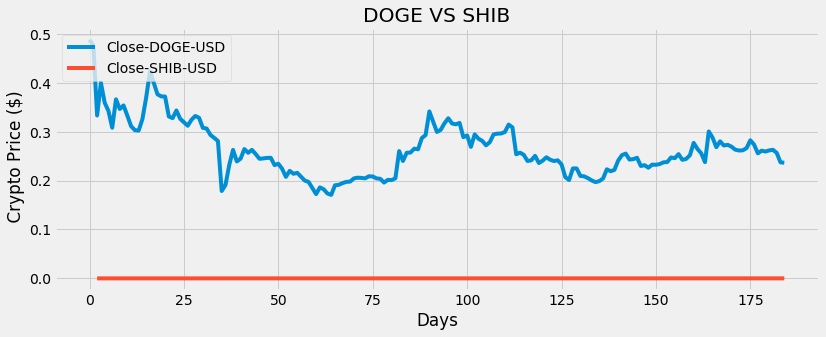

In [63]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
my_crypto = df1
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)
plt.title('DOGE VS SHIB')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [64]:
#Scale the data
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 100 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df1)
scaled

array([[100.        ,          nan],
       [ 96.28592   ,          nan],
       [ 51.19098243,   4.05405432],
       [ 72.34295147,   5.40540494],
       [ 59.47220291,   2.70270247],
       [ 54.10749169,   2.70270247],
       [ 43.29040791,   2.70270247],
       [ 61.61038989,   6.75675679],
       [ 55.34720385,   4.05405432],
       [ 57.67808227,   5.40540494],
       [ 51.1348442 ,   4.05405432],
       [ 44.27877156,   2.70270247],
       [ 41.72587787,   2.70270247],
       [ 41.44646494,   2.70270247],
       [ 48.88470032,   4.05405432],
       [ 62.84505497,   4.05405432],
       [ 79.65315823,   4.05405432],
       [ 72.27010242,   5.40540494],
       [ 64.81483666,   4.05405432],
       [ 63.50732252,   2.70270247],
       [ 63.39063809,   4.05405432],
       [ 50.53723006,   2.70270247],
       [ 49.47664707,   1.35135124],
       [ 54.4102509 ,   1.35135124],
       [ 49.05531429,   1.35135124],
       [ 46.85027461,   0.        ],
       [ 44.5559758 ,   0.        ],
 

In [65]:
df1_scale = pd.DataFrame(scaled, columns = df1.columns)

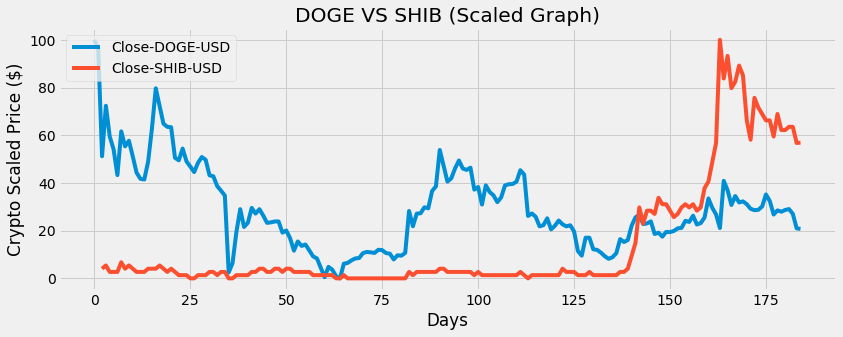

In [66]:
#Visualize the scaled data
my_crypto = df1_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label=c)
plt.title('DOGE VS SHIB (Scaled Graph)')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [54]:
DSR = df1.pct_change(1)
DSR

,Close-DOGE-USD,Close-SHIB-USD
0,NaN,NaN
1,-0.024139,NaN
2,-0.300331,NaN
3,0.201340,0.111111
4,-0.101981,-0.200000
...,...,...
180,0.008835,0.000000
181,0.004608,0.019231
182,-0.024278,0.000000
183,-0.075157,-0.094340


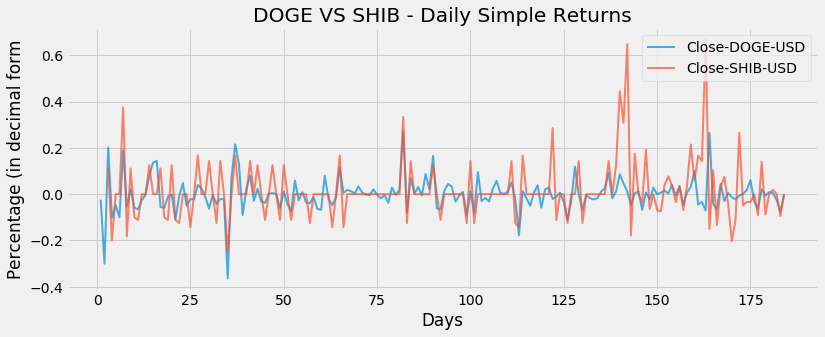

In [67]:
plt.figure(figsize=(12, 4.5))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('DOGE VS SHIB - Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [56]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


Close-DOGE-USD    0.071845
Close-SHIB-USD    0.124407
dtype: float64

In [57]:
DSR.mean()

Close-DOGE-USD   -0.001279
Close-SHIB-USD    0.016019
dtype: float64

In [58]:
DSR.corr()

,Close-DOGE-USD,Close-SHIB-USD
Close-DOGE-USD,1.00000,0.39076
Close-SHIB-USD,0.39076,1.00000


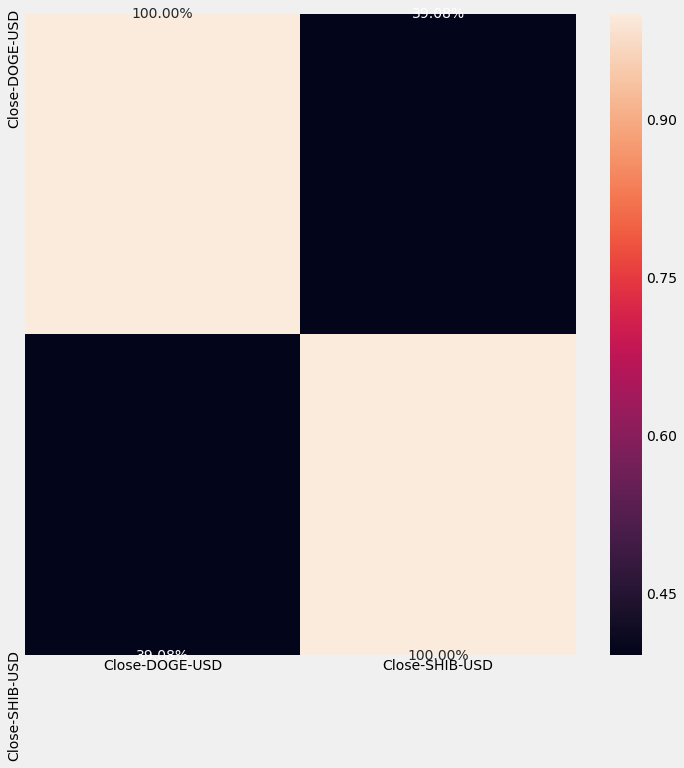

In [59]:
import seaborn as sns
plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [60]:
DCSR = (DSR+1).cumprod()
DCSR

,Close-DOGE-USD,Close-SHIB-USD
0,NaN,NaN
1,0.975861,NaN
2,0.682780,NaN
3,0.820251,1.111111
4,0.736602,0.888889
...,...,...
180,0.536401,5.777778
181,0.538873,5.888889
182,0.525791,5.888889
183,0.486274,5.333333


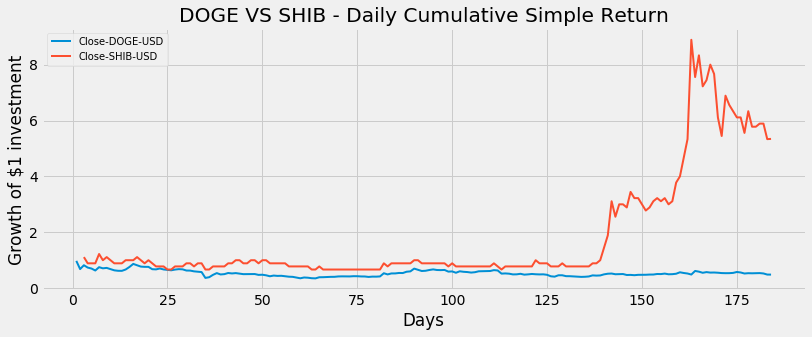

In [68]:
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
plt.title('DOGE VS SHIB - Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()